<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module_4_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 3: Gradient Descent

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
np.random.seed(42)

## Creating the Data

In [29]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

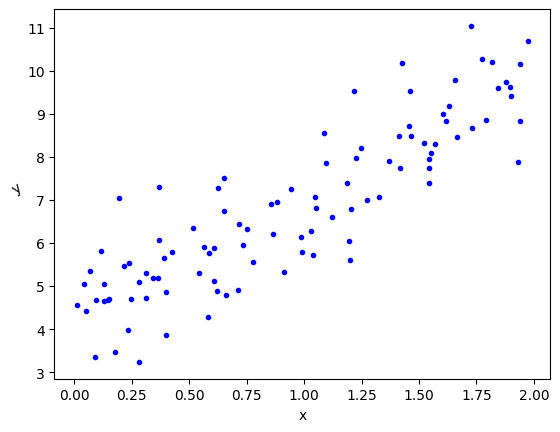

In [30]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=35)

## Cost Function

In [31]:
def cal_cost(y_pred, X, y):
    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

In [32]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history


In [33]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


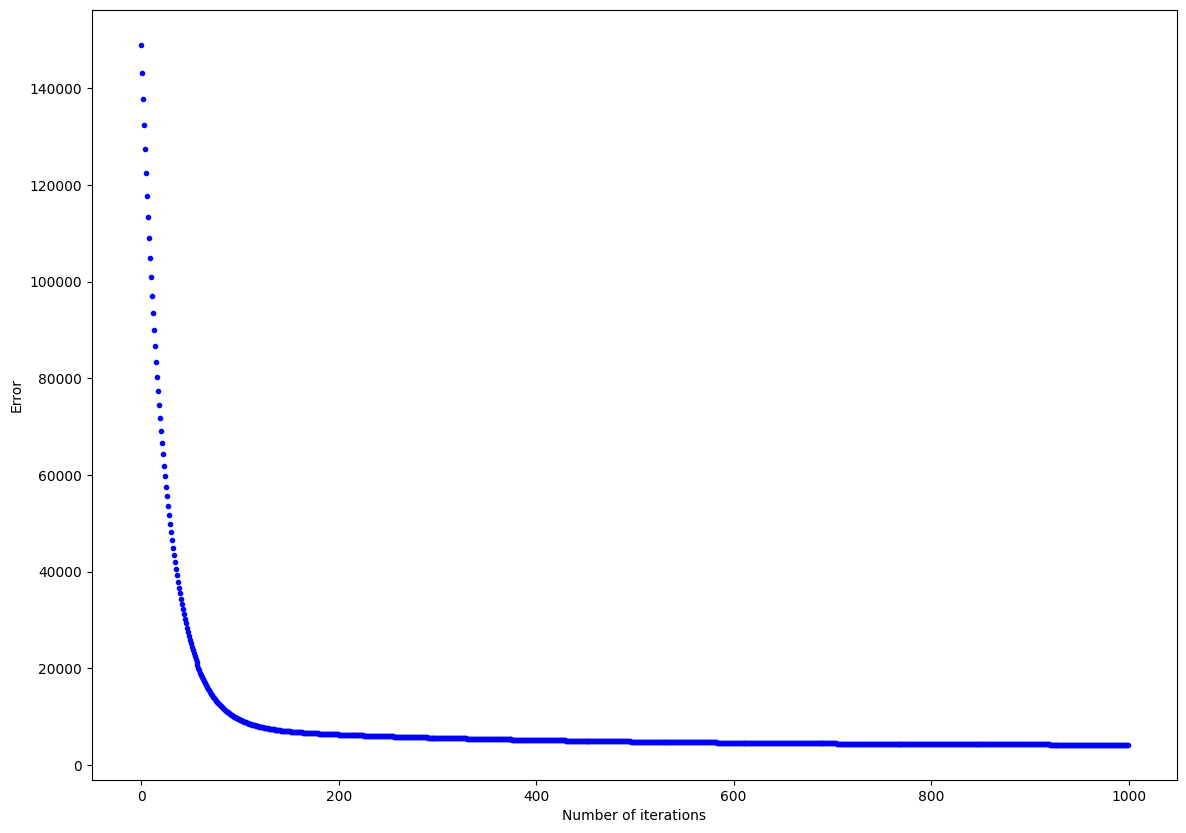

In [34]:
fig, ax = plt.subplots(figsize=(14,10))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

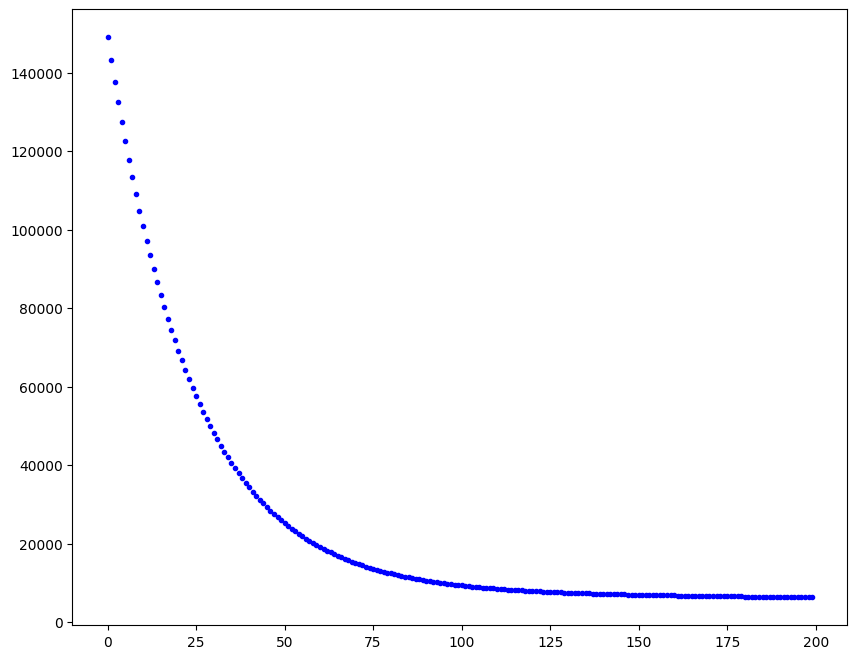

In [35]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

## Stochastic Gradient Descent

In [42]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.05, iterations=20):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history



In [43]:
lr = 0.5
n_iter = 100

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: 4.271
y_pred[1]: 2.796
Final error: 43.863


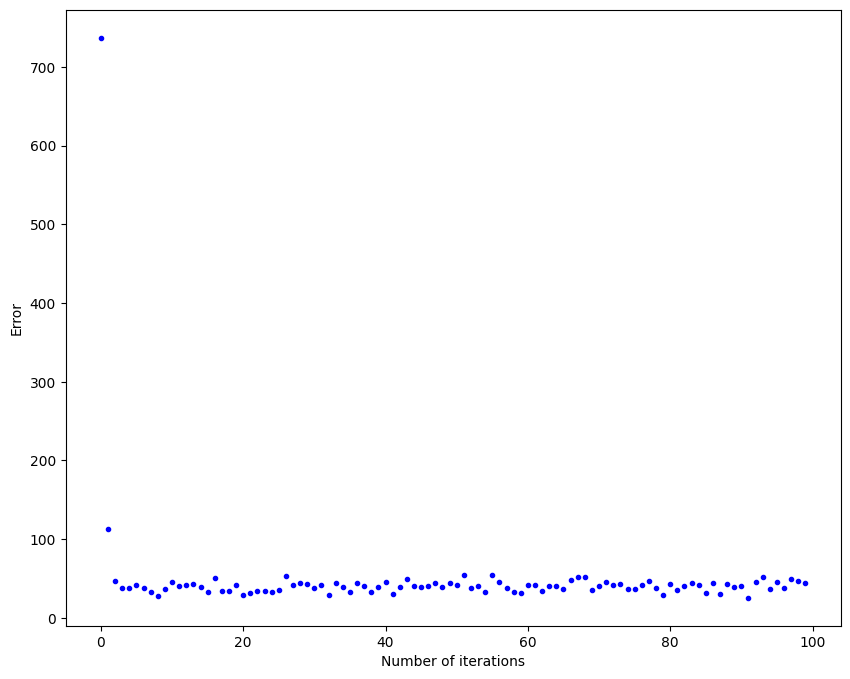

In [44]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

## Mini Batch Gradient Descent

In [45]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [46]:
lr = 0.3
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.212
y_pred[1]: 2.768
Final error: 802.398


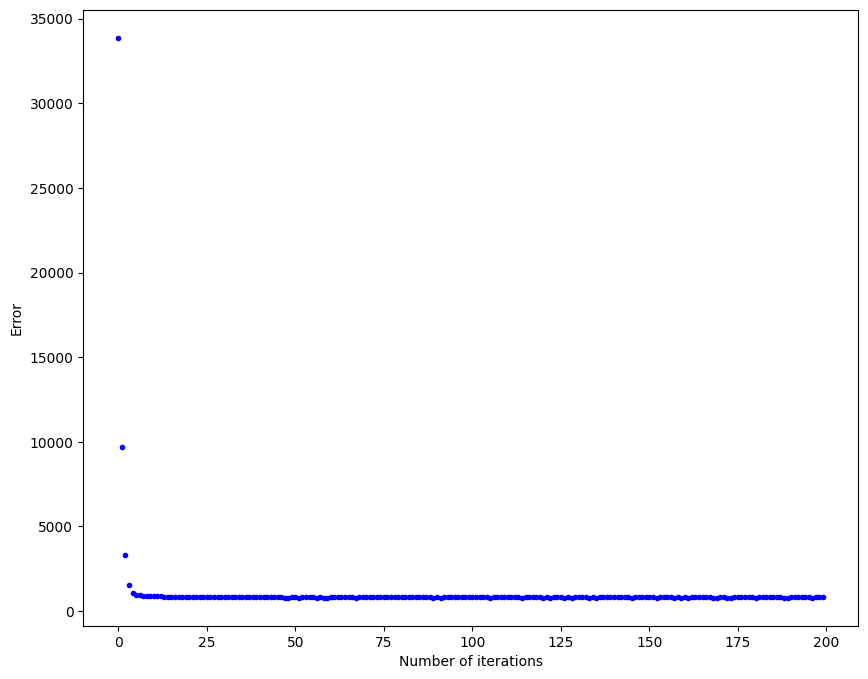

In [47]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

## Things to try out:

### 1.Change batch size in mini-batch gradient descent.

In [48]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=25):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

minibatch_gradient_descent(X, y, y_pred,learning_rate=0.01, iterations=10)


(array([[ 1.63381373],
        [-0.39404044]]),
 array([64377.19881662, 61810.15029446, 59337.90668488, 56977.3487911 ,
        54704.93021206, 52526.26345287, 50431.50309281, 48434.73243244,
        46511.33382549, 44665.66292319]))

In [49]:
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred,learning_rate=0.001, iterations=100)
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 1.633
y_pred[1]: -0.396
Final error: 44098.237


### 2.Test all the three out on real datasets.

In [57]:
import pandas as pd
from sklearn.datasets import load_iris

In [58]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

X = data.drop('target', axis=1)
y = data['target']

In [59]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

def cal_cost(y_pred, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
    return cost

def gradient_descent(X, y, y_pred, learning_rate, iterations):
    m = len(y)
    y_pred_history = np.zeros((iterations, y_pred.shape[0]))  # Initialize the history array

    for it in range(iterations):
        prediction = X.dot(y_pred)
        errors = prediction - y
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot(errors))
        y_pred_history[it, :] = y_pred.flatten()

    cost_history = cal_cost(X.dot(y_pred), y)

    return y_pred, cost_history, y_pred_history
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target'] = np.where(data['target'] == 0, 0, 1)

X = data.drop('target', axis=1)
y = data['target'].values.reshape(-1, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred = np.random.randn(X_b.shape[1], 1)

lr = 0.01
n_iter = 1000

y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history))


y_pred[0]: -1.507
y_pred[1]: 0.152
Final error: 0.035


In [21]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

def cal_cost(y_pred, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
    return cost

def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i)

        cost_history[it]  = cost

    return y_pred, cost_history
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target'] = np.where(data['target'] == 0, 0, 1)

X = data.drop('target', axis=1)
y = data['target'].values.reshape(-1, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred = np.random.randn(X_b.shape[1], 1)

lr = 0.01
n_iter = 1000

y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: -0.444
y_pred[1]: 0.230
Final error: 24103.378


In [67]:
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=25):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i: i + batch_size]
            y_i = y_shuffled[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target'] = np.where(data['target'] == 0, 0, 1)

X = data.drop('target', axis=1).values
y = data['target'].values.reshape(-1, 1)


y_pred = np.random.randn(X.shape[1] + 1, 1)
lr = 0.01
n_iter = 100

y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, learning_rate=lr, iterations=n_iter, batch_size=25)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: 0.248
y_pred[1]: -0.111
Final error: 0.103


### 3.Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

In [50]:
def gradient_descent(X, y, y_pred, learning_rate=0.5, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

In [51]:
lr = 0.5
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.215
y_pred[1]: 2.770
Final error: 4032.923


In [52]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.5, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [53]:
lr = 0.5
n_iter = 1000
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.198
y_pred[1]: 2.763
Final error: 29.214


In [54]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=25):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

minibatch_gradient_descent(X, y, y_pred,learning_rate=0.01, iterations=10)

(array([[4.20054202],
        [2.76486158]]),
 array([1008.80065379, 1008.83847659, 1008.40646765, 1008.81735772,
        1008.7502906 , 1008.4803026 , 1008.36821102, 1008.69412433,
        1008.64334671, 1008.59784303]))

In [55]:
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred,learning_rate=0.001, iterations=100)
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.201
y_pred[1]: 2.765
Final error: 1008.680


### 1.Batch Gradient Descent (BGD):

Effect of Increasing Learning Rate: If the learning rate is too high, BGD may overshoot the minimum and fail to converge. The algorithm might oscillate or even diverge.
Effect of Decreasing Learning Rate: A smaller learning rate can make the algorithm converge very slowly, especially for deep and complex models. It may also get stuck in local minima.
### Stochastic Gradient Descent (SGD):

Effect of Increasing Learning Rate: Higher learning rates in SGD may lead to faster convergence for some datasets but can make the algorithm diverge or oscillate due to the high variability in the updates.
Effect of Decreasing Learning Rate: A smaller learning rate in SGD can make the algorithm more stable, but it might slow down convergence. It can also get stuck in local minima.
Mini-Batch Gradient Descent:

Effect of Increasing Learning Rate: Similar to BGD and SGD, increasing the learning rate in Mini-Batch GD can lead to overshooting and instability. The impact may be less severe than in BGD due to the averaging effect of mini-batches.
Effect of Decreasing Learning Rate: A smaller learning rate can lead to stable convergence, but it might slow down the algorithm. Tuning the learning rate for mini-batch GD often requires experimentation.